### Handling imports

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### fetching data and splitting

In [2]:
data = datasets.load_breast_cancer()
xtrain,xtest,ytrain,ytest = train_test_split(data.data,data.target,random_state=0)

### choosing k
see KNN_using_sklearn for ref

1 0.9200820793433653
2 0.9224623803009576
3 0.9271682626538988
4 0.929466484268126
5 0.9270861833105334
6 0.9294391244870039
7 0.9294664842681257
8 0.936497948016416
9 0.9341723666210668
10 0.9388508891928863
11 0.9341723666210668
12 0.9341997264021888
13 0.9341723666210671
14 0.9388782489740082
15 0.929466484268126
16 0.929466484268126
17 0.922435020519836
18 0.9247879616963065
19 0.9200820793433653


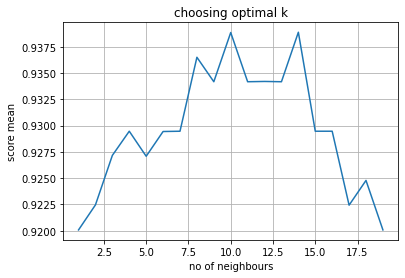

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
x_axis = []
y_axis = []
for i in range(1,20) :
    clf = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf,xtrain,ytrain)
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i,score.mean())

plt.xlabel("no of neighbours")
plt.ylabel("score mean")
plt.title("choosing optimal k")
plt.grid()
plt.plot(x_axis,y_axis)
plt.show()
    

### setting n_neighbours = 14 as we have seen we get best results when n = 14

In [4]:
clf = KNeighborsClassifier(n_neighbors=14)
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=14)

In [5]:
clf.score(xtest,ytest)

0.958041958041958

# implementing own KNN



we get xtrain row like [v1,v2,v3,v4....] and xtest is1 value in xtest that is v <br>
euclid distance = diff of (xtrain - xtest)^2 <br>
diff of (xtrain - xtest)^2 this returns an list and we will get its sum



In [70]:
def getEuclidDistance(ith_xtrain,xtest):
    squared_diff = (ith_xtrain - xtest)**2
    total_sum = squared_diff.sum()
    return total_sum
    

The target  list contains  the class to which a particular point belongs to <br>
 since the distances array contain multiple list with the first index  <br>containing the distance and the next contain index of that point  <br>


In [71]:
def getTargetArray(distances,k,ytrain) :
    targets = []
    for i in range(k) :
        index = distances[i][1]
        targets.append(ytrain[index]) 
    return targets

In [72]:
def predict_for_one(xtrain,ytrain,xtest,k) :
    distances = []
    for i in range(len(xtrain)) :
        distance = getEuclidDistance(xtrain[i,:],xtest)
        distances.append([distance,i])
    # sort the array on the basis of distances 
    distances = sorted(distances)
    targets = []
    targets = getTargetArray(distances,k,ytrain)
    tuple_with_targets_count = Counter(targets).most_common(1)[0]
    return tuple_with_targets_count[0]
         

### own predict functiom

In [73]:
def predict(xtrain,ytrain,xtest,k) :
    predictions = []
    for x in xtest :
        predictions.append(predict_for_one(xtrain,ytrain,x,k))
    return predictions
        

In [74]:
from sklearn.metrics import accuracy_score
ypred = predict(xtrain,ytrain,xtest,14)
accuracy_score(ytest,ypred)

0.958041958041958

## -------------------- END of implementation ----------------------------

### for counter understanding not part of the solution

In [45]:
from collections import Counter
a = [1,2,0,1,2,0,1,2,0,2,1,1,1,2,0,0]
Counter(a).most_common(1)[0]

(1, 6)

In [46]:
xtrain[2,:]

array([2.013e+01, 2.825e+01, 1.312e+02, 1.261e+03, 9.780e-02, 1.034e-01,
       1.440e-01, 9.791e-02, 1.752e-01, 5.533e-02, 7.655e-01, 2.463e+00,
       5.203e+00, 9.904e+01, 5.769e-03, 2.423e-02, 3.950e-02, 1.678e-02,
       1.898e-02, 2.498e-03, 2.369e+01, 3.825e+01, 1.550e+02, 1.731e+03,
       1.166e-01, 1.922e-01, 3.215e-01, 1.628e-01, 2.572e-01, 6.637e-02])

### Sir Code 

In [40]:
def predict_one_sir(x_train, y_train, x_test, k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i, :] - x_test)**2).sum()
        distances.append([distance, i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0]

def predict_sir(x_train, y_train, x_test_data, k):
    predictions = []
    for x_test in x_test_data:
        predictions.append(predict_one_sir(x_train, y_train, x_test, k))
    return predictions

In [41]:
ypred_sir = predict_sir(xtrain,ytrain,xtest,14)
accuracy_score(ytest,ypred_sir)

0.958041958041958